In [ ]:
!pip install parsivar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 53.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from IPython.display import display, HTML
from parsivar import POSTagger,Tokenizer,DependencyParser,FindChunks,Normalizer
from parsivar import SpellCheck
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC



In [ ]:
%matplotlib inline

def highlight1_specific_text(text):
   #for i in range(len(df1))

    #x=str(df1.iat[2,0])
    #text = text.replace(x, '<span style="color: blue;"> </span>')

    text = text.replace(' يك ', '<span style="color: blue;">يك </span>')

    text = text.replace(' تك ', '<span style="color: blue;">تك </span>')
    text = text.replace(' روهر ', '<span style="color: blue;">روهر </span>')
    text = text.replace(' چولي ', '<span style="color: blue;">چولي </span>')
    text = text.replace(' درآمد ', '<span style="color: blue;">درآمد </span>')
    text = text.replace(' اجراي ', '<span style="color: blue;">اجراي </span>')
    text = text.replace(' ديگري ', '<span style="color: blue;">ديگري </span>')
    text = text.replace(' چهارسوي ', '<span style="color: blue;">چهارسوي </span>')
    text = text.replace(' توست ', '<span style="color: blue;">توست </span>')
    text = text.replace(' روانشناختي ', '<span style="color: blue;">روانشناختي </span>')
    text = text.replace(' متنهايي ', '<span style="color: blue;">متنهايي </span>')
    text = text.replace(' مناسبتر ', '<span style="color: blue;">مناسبتر	 </span>')
    text = text.replace(' آئيش ', '<span style="color: blue;">آئيش </span>')
    text = text.replace('بازيگري', '<span style="color: blue;">بازيگري </span>')
    text = text.replace(' معناي ', '<span style="color: blue;">معناي </span>')
    text = text.replace(' گريزي ', '<span style="color: blue;">گريزي </span>')
    text = text.replace(' رئاليزم ', '<span style="color: blue;">رئاليزم </span>')
    text = text.replace(' اصتفاده ', '<span style="color: blue;">اصتفاده </span>')
    text = text.replace(' غيررئاليستي ', '<span style="color: blue;">غيررئاليستي </span>')
    text = text.replace(' استليزه ', '<span style="color: blue;">استليزه </span>')
    text = text.replace(' متكي ', '<span style="color: blue;">متكي </span>')
    text = text.replace(' ديناميك ', '<span style="color: blue;">ديناميك </span>')
    text = text.replace(' ترك ', '<span style="color: blue;">ترك </span>')
    """
    text = text.replace(' افذوده ', '<span style="color: blue;">افذوده </span>')

    text = text.replace(' اقتصادي ', '<span style="color: blue;">اقتصادي </span>')
    text = text.replace(' تجاري ', '<span style="color: blue;">تجاري </span>')
    text = text.replace(' صنعتي ', '<span style="color: blue;">صنعتي </span>')
    text = text.replace(' اعضاي ', '<span style="color: blue;">اعضاي </span>')
    text = text.replace(' اجراي ', '<span style="color: blue;">اجراي </span>')
    text = text.replace(' ديگري ', '<span style="color: blue;">ديگري </span>')
    text = text.replace(' ارزيابي ', '<span style="color: blue;">ارزيابي </span>')
    text = text.replace(' واحدهاي ', '<span style="color: blue;">واحدهاي </span>')
    text = text.replace(' توليدي ', '<span style="color: blue;">توليدي </span>')
    text = text.replace(' سفر ', '<span style="color: blue;">سفر </span>')
    text = text.replace(' براي ', '<span style="color: blue;">براي </span>')
    text = text.replace(' 5/67 ', '<span style="color: blue;">5/67 </span>')
    text = text.replace('دستگاههاي', '<span style="color: blue;">دستگاههاي </span>')
    text = text.replace(' كامپيوتري ', '<span style="color: blue;">كامپيوتري </span>')
    text = text.replace(' هاي ', '<span style="color: blue;">هاي </span>')
    text = text.replace(' آندوكاتدروي ', '<span style="color: blue;">آندوكاتدروي </span>')
    text = text.replace(' پليمري ', '<span style="color: blue;">پليمري </span>')
    text = text.replace(' آبميوه ', '<span style="color: blue;">آبميوه </span>')
    """


    return text


In [ ]:
def highlight1_specific_text1(text):
   #for i in range(len(df1))

    #x=str(df1.iat[2,0])
    #text = text.replace(x, '<span style="color: blue;"> </span>')

    text = text.replace(' یک ', '<span style="color: red;">یک </span>')

    #text = text.replace(' تك ', '<span style="color: red;">تك </span>')
    text = text.replace(' رو هر ', '<span style="color: red;">رو هر </span>')
    text = text.replace('ولی ', '<span style="color: red;">ولی </span>')

    text = text.replace('در آمد', '<span style="color: red;">در آمد </span>')
    text = text.replace(' اجرای ', '<span style="color: red;">اجرای </span>')
    text = text.replace(' دیگری ', '<span style="color: red;">دیگری </span>')
    text = text.replace(' چهار سوی ', '<span style="color: red;">چهار سوی </span>')
    text = text.replace(' توسط ', '<span style="color: red;">توسط </span>')
    text = text.replace('روان‌شناختی ', '<span style="color: red;">روان‌شناختی </span>')
    text = text.replace(' متن هايي ', '<span style="color: red;">متن هايي </span>')
    text = text.replace(' مناسب تر ', '<span style="color: red;">مناسب تر </span>')
    text = text.replace(' آئین ', '<span style="color: red;">آئین </span>')
    text = text.replace('بازیگری', '<span style="color: red;">بازیگری </span>')
    text = text.replace(' معنای ', '<span style="color: red;">معنای </span>')
    text = text.replace(' گريزی ', '<span style="color: red;">گريزی </span>')
    text = text.replace(' رئالیسم ', '<span style="color: red;">رئالیسم </span>')
    text = text.replace(' استفاده ', '<span style="color: red;">استفاده </span>')
    text = text.replace(' غیر رئالیستی ', '<span style="color: red;">غیر رئالیستی </span>')
    text = text.replace(' است لیزه ', '<span style="color: red;">است لیزه </span>')
    text = text.replace(' ملکی ', '<span style="color: red;">ملکی </span>')
    text = text.replace(' دینامیک ', '<span style="color: red;">دینامیک </span>')
    text = text.replace(' ترک ', '<span style="color: red;">ترک </span>')
    """
    text = text.replace(' یک ', '<span style="color: red;">یک </span>')

    text = text.replace(' اقتصادی ', '<span style="color: red;">اقتصادی </span>')
    text = text.replace(' تجاری ', '<span style="color: red;">تجاري </span>')
    text = text.replace(' صنعی ', '<span style="color: red;">صنعی </span>')
    text = text.replace(' اعضای ', '<span style="color: red;">اعضای </span>')
    text = text.replace(' اجرای ', '<span style="color: red;">اجرای </span>')
    text = text.replace(' ديگری ', '<span style="color: red;">ديگری </span>')
    text = text.replace(' ارزیابی ', '<span style="color: red;">ارزیابی </span>')
    text = text.replace(' و احدهای ', '<span style="color: red;">و احدهای </span>')
    text = text.replace(' تولیدی ', '<span style="color: red;">تولیدی </span>')
    text = text.replace(' صفر ', '<span style="color: red;">صفر </span>')
    text = text.replace(' برای ', '<span style="color: red;">برای </span>')
    text = text.replace(' 5 / 67 ', '<span style="color: red;">5 / 67 </span>')
    text = text.replace('دستگاههای', '<span style="color: red;">دستگاههای </span>')
    text = text.replace(' کامپیوتری ', '<span style="color: red;">کامپیوتری </span>')
    text = text.replace(' های ', '<span style="color: red;">های </span>')
    text = text.replace(' آندوکاتدروی ', '<span style="color: red;">آندوکاتدروی </span>')
    text = text.replace(' پلیمری ', '<span style="color: red;">پلیمری </span>')
    text = text.replace('آب میوه', '<span style="color: red;">آب میوه </span>')
    """

    return text



In [ ]:
def delet_stopword(text):


    mylist =['کردن','شوید','دارای','ارائه','بعد','بصورت','راحت','پس','منتظر','نمون','همین','الان','باشد','توانید','آنها','کنیدتا','بدون','خدابا','هفته','دارای','me','com','http','https','info','www','support','آن','در', 'این',':','از','با','به','؛',':','،','آقا','آقای','آقایان','آمد','آمدن','هر','فرا','هم','مانند','بود','هنگامی','که'
               ,'دری','روی','ما','شود','باز','دیگر','را','دوزیم','بودهنگامی','بسته','می','شود','ولی','اغلب','زد','شود','چنان','بود','دربسته',
               'دوزيم','او','دنبال','ام','اما','می','بعد','چه','مرحله','ماه','@username','يکي','اينه','com','link','www','برنامه','دارند','نفر','هزاران',
               '۸۰','۲۰','خورده','زده','شبکه2بخشی','فقط300','ندارن','یکی', 'یادت','نره','فقط','خود','شدن','بشند','اینها','همون','هستند','رو','کنه','تا'
               ,'مود','داشت','شدی','اینکه','برآمده','هستن','تر','سارا','شاءن','بگذار','۶۵','rfj_farsi_bot','همونطور','میریختن','يك','داري','غير','انقد',
               'بخورم','۵۲','آخرین','آخری','10','کنید','.','"',':','-']


    s=""
    x=str(text).split(" ")

    for l in x:
        if l not in mylist and len(l) > 3 and l!="کنید" :


           s=s+" "+ l


    return s

In [ ]:
x1=[]
fa=[]
fa_n=[]
pr_dict={}
dic={}
dic1={}
#pd.options.display.max_columns =400
df=pd.read_excel(r'/content/nlp.xlsx',sheet_name='Sheet2')
#display(HTML(df.to_html(escape=False)))
normalizer = Normalizer()
normalizer =Normalizer(pinglish_conversion_needed=True)
myspell_checker = SpellCheck()
n=5
for i in range(n):
    x1.append(df.iat[i,0])
#dfs=df.head(5)
#dfs=dfs[['text']]
#display(HTML(dfs.to_html(escape=False)))
sp1=x1[0].split(" ")

for i in range(n):
    #x1.append(df.iat[i,0])
    fa.append(normalizer.normalize(str(df.iat[i,0])))
    fa_n.append(myspell_checker.spell_corrector(str(fa[i])))
    k=df.iat[i,0]
    pr_dict[k]=fa_n[i]

#fa.append(normalizer.normalize(str(df.iat[10,0])))
#fa_n.append(myspell_checker.spell_corrector(str(fa[0])))
#k=df.iat[10,0]
#pr_dict[k]=fa_n[0]
df2 = pd.DataFrame.from_dict(pr_dict.items())
df2.rename(columns={0: 'incorrec',1: 'correc'}, inplace=True)
#df2=df2.reset_index(drop=True, inplace=True)

for w in sp1:
    ch1=normalizer.normalize(str(w))
    ch=myspell_checker.spell_corrector(str(ch1))
    if ch != w :
       k=w
       dic[k]=ch
df1 = pd.DataFrame.from_dict(dic.items())
df1.rename(columns={0:'incorrec',1: 'correc'}, inplace=True)
#df1=df1.loc[[3,4,8,12,15,16,17,28,29,41,43,48,50,51,53,54]]



df1=df1.loc[[5,6,10,12,13,15,16,18,19,26,49,57,67,73,74,
             80,83,88,89,91,107,123,140,168]]


#display(HTML(df1.to_html(escape=False)))
#df2['correc'] = df2['correc'].apply(highlight_specific_text,df1)
l1=df1['incorrec'].tolist()

df2['incorrec'] = df2['incorrec'].apply(highlight1_specific_text)
df2['correc'] = df2['correc'].apply(highlight1_specific_text1)

display(HTML(df1.to_html(escape=False)))
display(HTML(df2.to_html(escape=False)))


# New Section

In [ ]:

df=df.drop_duplicates(subset='text', keep="last")
df['text'] = df['text'].apply(delet_stopword)
counter = CountVectorizer(binary=True)

f_text = counter.fit_transform(df['text'])
#feu = {k:[v] for k,v in list(counter.vocabulary_.items())[:200]}
feu = {k:[v] for k,v in list(counter.vocabulary_.items())}
vec = TfidfVectorizer(min_df=5, max_df=0.5)
vector = vec.fit_transform(df['text'].astype('U'))
X_train, X_test, y_train, y_test = train_test_split(vector, df['class'], test_size=0.25, random_state=111)
dummy_clf = DummyClassifier(strategy='uniform', random_state=42)

dummy_clf.fit(X_train, y_train)

ac1=dummy_clf.score(X_test, y_test)
mnb = MultinomialNB(alpha=0.2)

mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

ac=accuracy_score(y_test, y_pred)
df3 = pd.DataFrame({"base line Accuracy":ac1,"model Accuracy":ac}, index=[0])
display(HTML(df3.to_html(escape=False)))



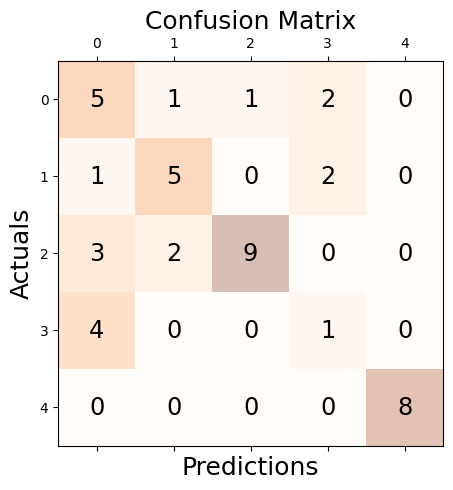

In [ ]:
clff= DecisionTreeClassifier()

clff.fit(X_train, y_train)

y_pred = clff.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
   for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i, j],va='center',ha='center',size='xx-large')
        plt.xlabel('Predictions', fontsize=18)
        plt.ylabel('Actuals', fontsize=18)
        plt.title('Confusion Matrix', fontsize=18)

plt.show()

In [ ]:
def return_spli(x1,y1,h):

        dfh = pd.DataFrame(x1.toarray())
        rdf=dfh.shape[0]
        cdf=dfh.shape[1]
        dfs=pd.DataFrame(y1)
        if h==0:
           dfnn=pd.concat([dfh.reset_index(drop=1).add_suffix('_tr'),dfs.reset_index(drop=1).add_suffix('_tr')], axis=1,).fillna('')
        else:
           dfnn=pd.concat([dfh.reset_index(drop=1).add_suffix('_te'),dfs.reset_index(drop=1).add_suffix('_te')], axis=1,).fillna('')
        return dfnn
df5=return_spli(X_train,y_train,0)
df6=return_spli(X_test,y_test,1)
display(HTML(df6.to_html(escape=False)))
display(HTML(df5.to_html(escape=False)))